In [1]:
#importing libraries such as pandas, numpy and matploylib, seaborn for the visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading our cleaned_releases_allmedia csv file to use
df = pd.read_csv('cleaned_releases_Land.csv')

In [3]:
#printing the columns of our dataset
df.columns

Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'NAICS', 'NAICS Title',
       'PROVINCE', 'Latitude', 'Longitude', 'CAS_Number',
       'Substance Name (English)', 'Estimation_Method',
       'Total Release to Land'],
      dtype='object')

In [4]:
#checking if there is still any missing values but we already cleaned in our old file
df.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Company_Name,0
NAICS,0
NAICS Title,0
PROVINCE,0
Latitude,0
Longitude,0
CAS_Number,0
Substance Name (English),0


In [6]:
# Selecting only numerical columns (float64 and int64 types) from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the first quartile (Q1) - 25th percentile for each numerical column
Q1 = df[numerical_columns].quantile(0.25)

# Calculating the third quartile (Q3) - 75th percentile for each numerical column
Q3 = df[numerical_columns].quantile(0.75)

# Computing the Interquartile Range (IQR), which is the range between Q3 and Q1
IQR = Q3 - Q1

# Defining the lower bound for detecting outliers (1.5 * IQR below Q1)
lower_bound = Q1 - 1.5 * IQR

# Defining the upper bound for detecting outliers (1.5 * IQR above Q3)
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers by checking if values are outside the lower or upper bounds
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Counting the number of outliers per column
outliers_count = outliers.sum()

# Printing the number of outliers detected in each numerical column
print("Number of outliers per column:")
print(outliers_count)




Number of outliers per column:
Reporting_Year              0
NPRI_ID                   839
NAICS                     913
Latitude                   25
Longitude                   6
Total Release to Land    1487
dtype: int64


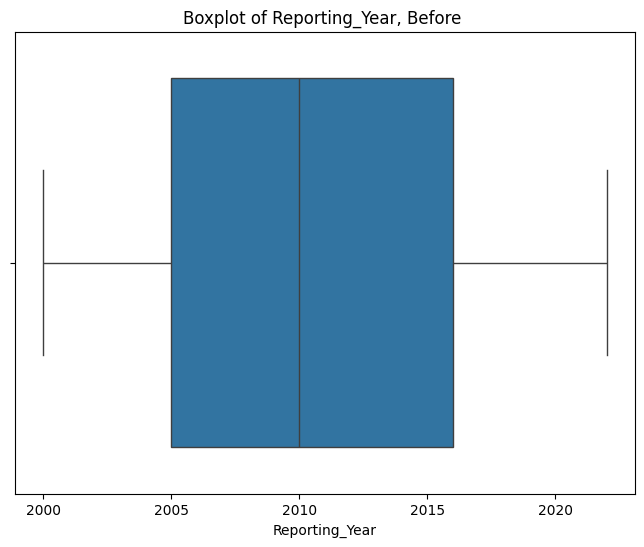

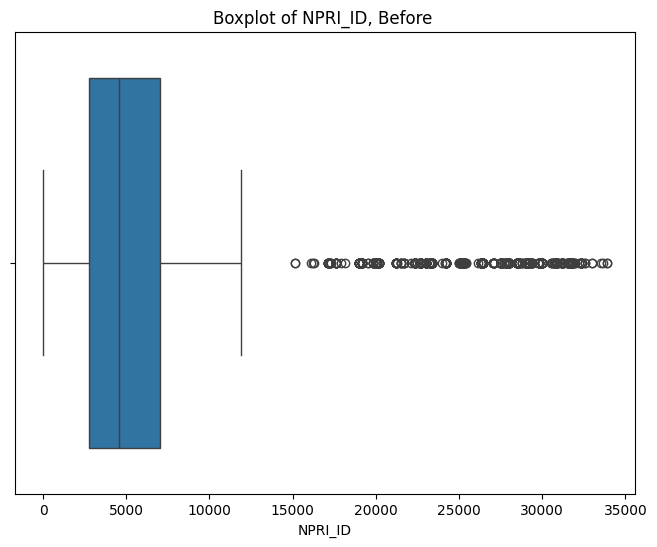

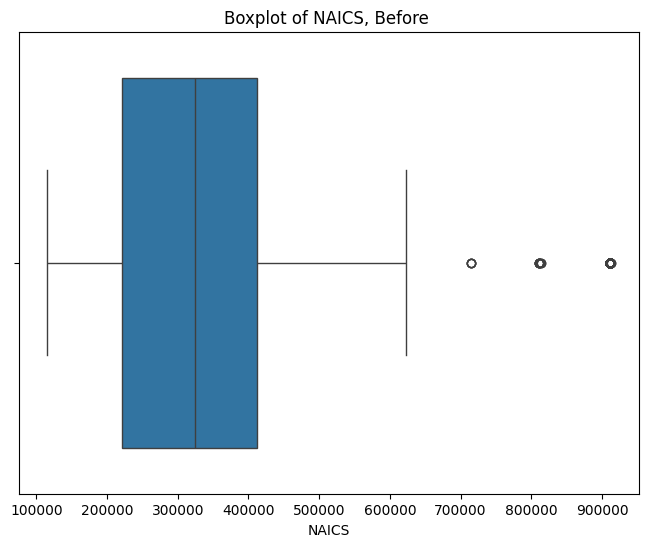

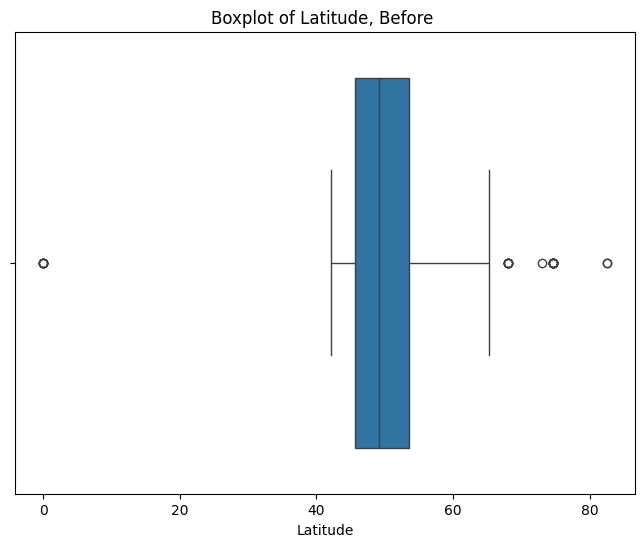

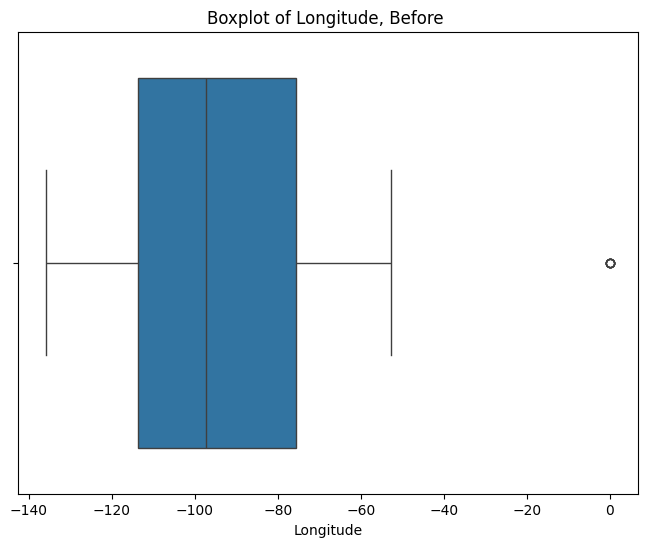

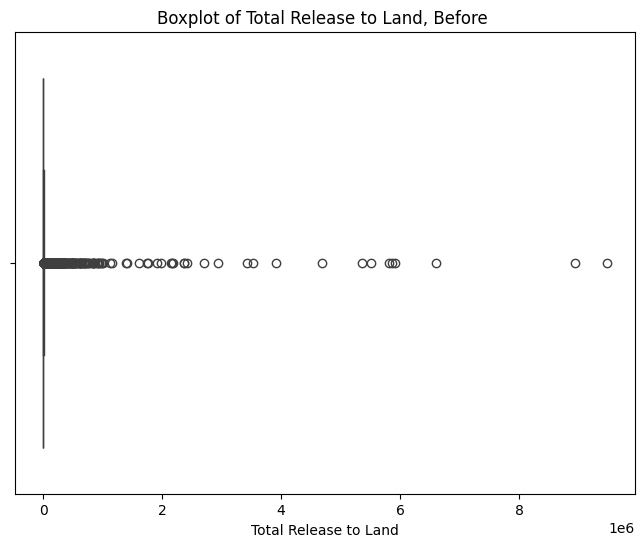

In [7]:
# Generating a boxplot for the current column to visualize its distribution and outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}, Before ')
    plt.show()

In [8]:
# Capping outliers at the upper and lower bounds
for col in numerical_columns:
    # If a value is greater than the upper bound, replace it with the upper bound.
    # If a value is less than the lower bound, replace it with the lower bound.
    # Otherwise, keep the original value.
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col],
                       np.where(df[col] < lower_bound[col], lower_bound[col], df[col]))

    print("Outliers have been capped.")

Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.


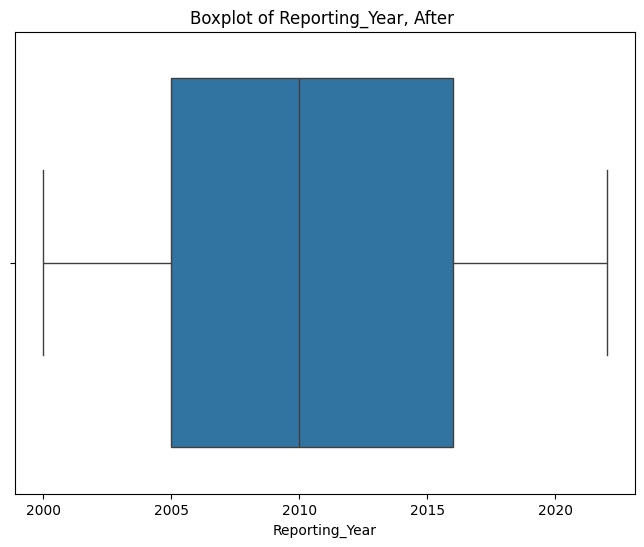

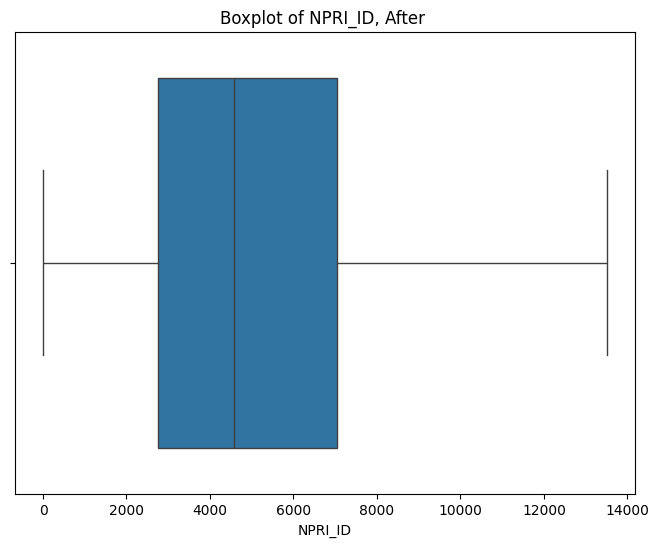

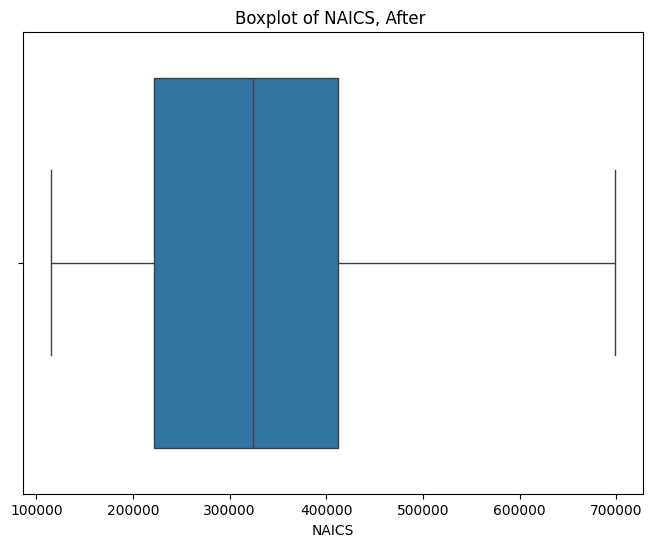

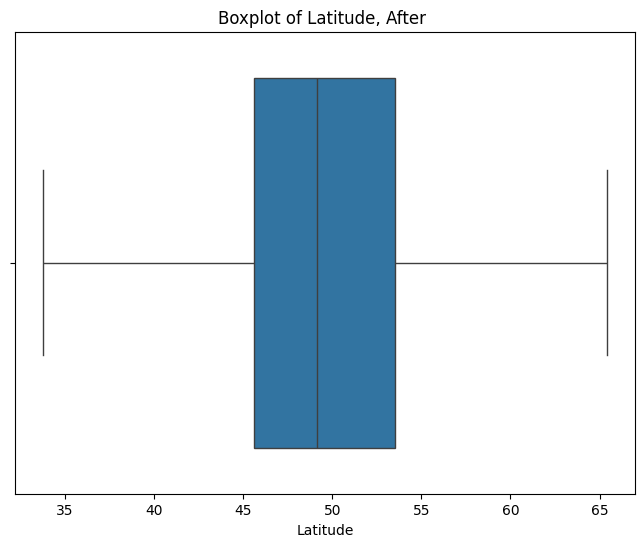

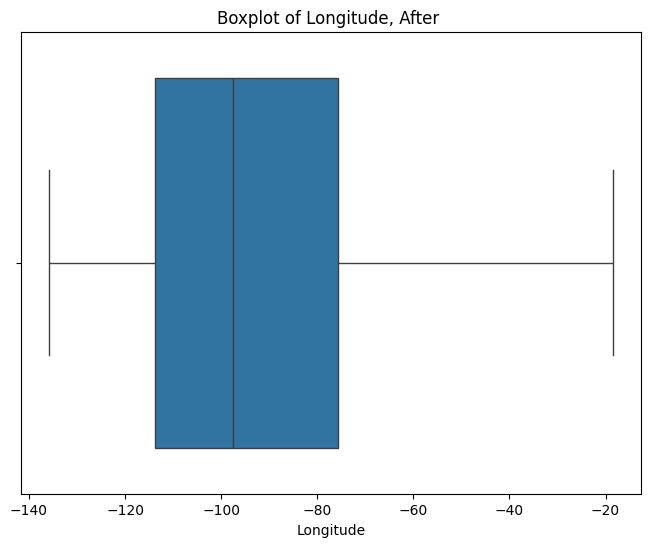

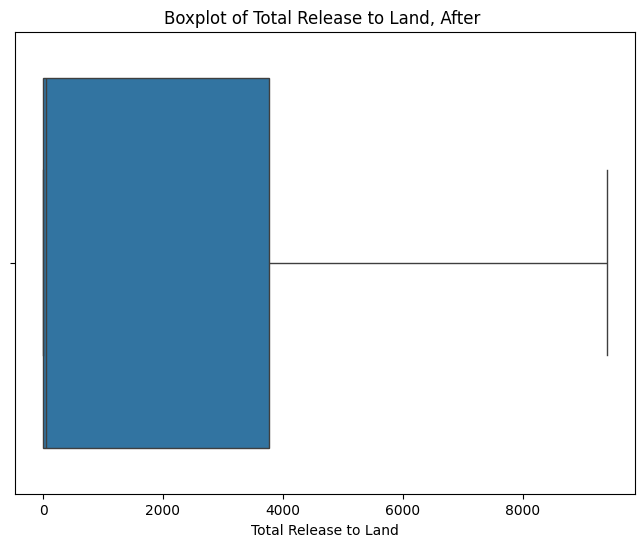

In [9]:
# Generating a boxplot for the current column to visualize its distribution after removing outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}, After ')
    plt.show()

In [11]:
#saving the new csv file after removing outliers
df.to_csv("After Removing Outliers Land.csv", index=False)

This bar chart shows the total land releases of pollutants across the top 10 provinces in Canada.

Ontario (ON) has the highest land emissions, followed by Alberta (AB) and Quebec (QC).
British Columbia (BC) and Newfoundland & Labrador (NL) have moderate emissions.
The remaining provinces (NB, MB, NS, SK, and PE) have much lower emissions, with PE being the lowest.
The chart highlights major contributors to land pollution, showing regional differences in industrial activities and waste disposal.

<ipython-input-10-5e537b4fcf29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinces.index, y=top_provinces.values, palette="viridis")


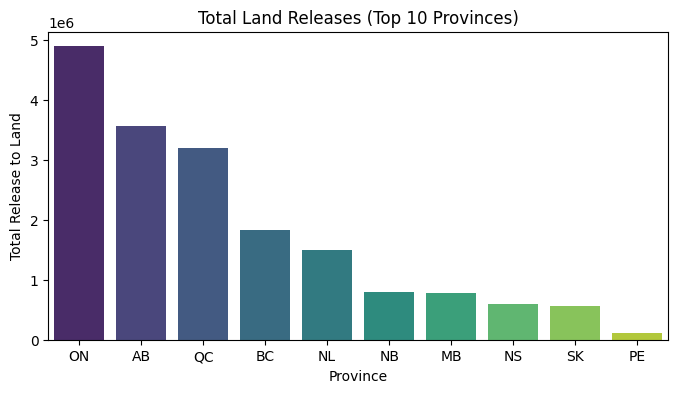

In [10]:
# Get the top 10 provinces by total Land release
top_provinces = df.groupby("PROVINCE")["Total Release to Land"].sum().nlargest(10)

# Bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=top_provinces.index, y=top_provinces.values, palette="viridis")

# Labels and title
plt.title("Total Land Releases (Top 10 Provinces)")
plt.xlabel("Province")
plt.ylabel("Total Release to Land")

plt.show()


This bar chart illustrates total pollutant releases to land per year from 2000 to 2022.

Upward Trend (2000–2014): Releases generally increased, peaking around 2014–2015. This suggests rising industrial activity or increased reporting over time.
Decline (2015–2019): A noticeable drop occurs after 2015, possibly due to stricter regulations, improved waste management, or reduced industrial emissions.
Recent Increase (2020–2022): After 2019, releases begin rising again, which could be linked to economic recovery post-pandemic or shifts in industrial production.
The chart helps visualize long-term trends in land pollution and potential regulatory or economic influences on pollutant releases.

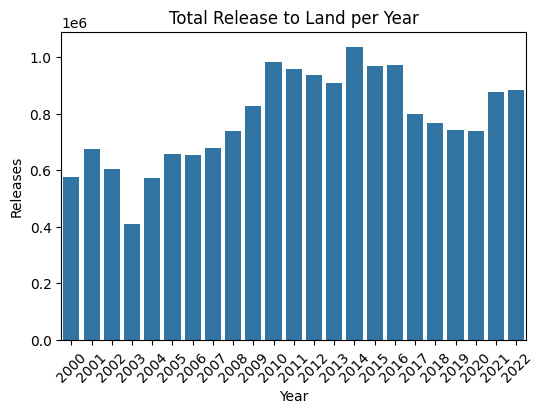

In [ ]:
df_grouped = df.groupby('Reporting_Year')['Total Release to Land'].sum().reset_index()
df_grouped['Reporting_Year'] = df_grouped['Reporting_Year'].astype(int)  # Convert to integer

plt.figure(figsize=(6,4))
sns.barplot(x='Reporting_Year', y='Total Release to Land', data=df_grouped)
plt.title('Total Release to Land per Year')
plt.xlabel('Year')
plt.ylabel('Releases')
plt.xticks(rotation=45)
plt.show()


This heatmap displays air emissions over time across different Canadian provinces.

Color Scale:

Dark blue represents low emissions, while red indicates high emissions.
The color bar on the right shows emission levels, with the highest values exceeding 250,000.
Observations:

Some provinces (e.g., Ontario, Alberta, and Quebec) have higher emissions (red/orange regions).
Other provinces remain consistently low in emissions (mostly blue).
Certain years show data gaps (white spaces), possibly due to negligible or zero emissions in those years.
Some provinces display a decline in emissions over time, while others have fluctuations or spikes in specific years.
This heatmap effectively visualizes how emissions vary by region and over time, helping identify key trends and provinces contributing the most to air pollution.

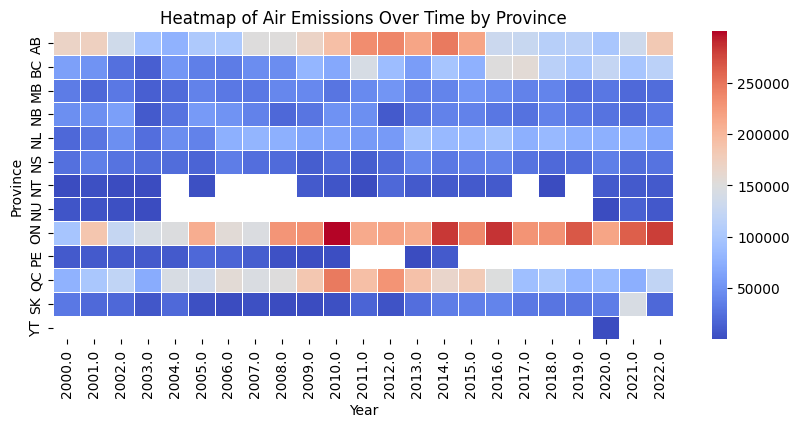

In [ ]:
pivot_df = df.pivot_table(values="Total Release to Land", index="PROVINCE", columns="Reporting_Year", aggfunc="sum")

plt.figure(figsize=(10, 4))
sns.heatmap(pivot_df, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of Air Emissions Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Province")
plt.show()



This line graph visualizes land pollution trends from 2000 to 2022 for the five provinces with the lowest emissions (NT, NU, PE, SK, YT). The y-axis represents the total release to land, while the x-axis shows the years.

Saskatchewan (SK) had relatively low emissions until around 2010, followed by a gradual increase and a sharp spike in 2021, reaching over 140,000 before dropping drastically.
Prince Edward Island (PE) initially showed some variation but remained consistently low after 2010.
Northwest Territories (NT) and Nunavut (NU) maintained low levels with small fluctuations.
Yukon (YT) had almost no emissions until 2020, when a minor increase was observed.
The sharp rise and fall in SK’s data may indicate a specific industrial event or regulatory change, while other provinces show relatively stable trends with minor variations over time.

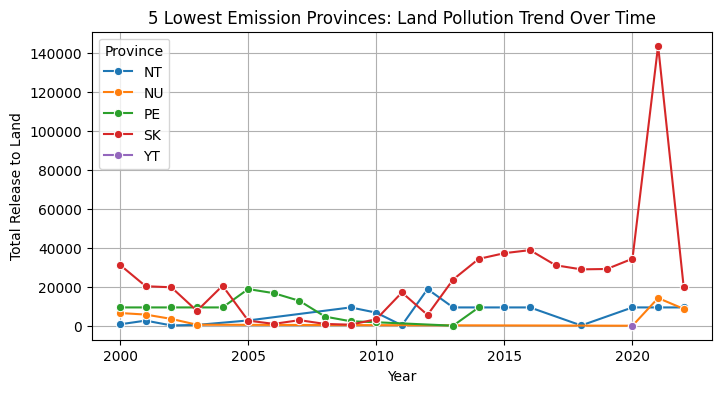

In [ ]:

province_trend = df.groupby(["PROVINCE", "Reporting_Year"])["Total Release to Land"].sum().reset_index()

# Get Bottom 5 provinces with lowest  emissions
bottom_5_provinces = province_trend.groupby("PROVINCE")["Total Release to Land"].sum().nsmallest(5).index

# Filter data for only the top 5 provinces
df_bottom_5 = province_trend[province_trend["PROVINCE"].isin(bottom_5_provinces)]

# Plot the trend
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_bottom_5, x="Reporting_Year", y="Total Release to Land", hue="PROVINCE", marker="o")

# Formatting
plt.title("5 Lowest Emission Provinces: Land Pollution Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Release to Land")
plt.legend(title="Province")
plt.grid(True)
plt.show()


The graphs show the top companies contributing to land pollution based on total emissions released. The first graph has truncated company names, while the second displays full names, providing more clarity. The Department of National Defence leads by a significant margin, followed by Jazz Aviation LP and other aviation-related companies. This suggests that military and aviation industries are major contributors to land emissions. The y-axis represents total release to land, while the x-axis lists the top polluting companies.

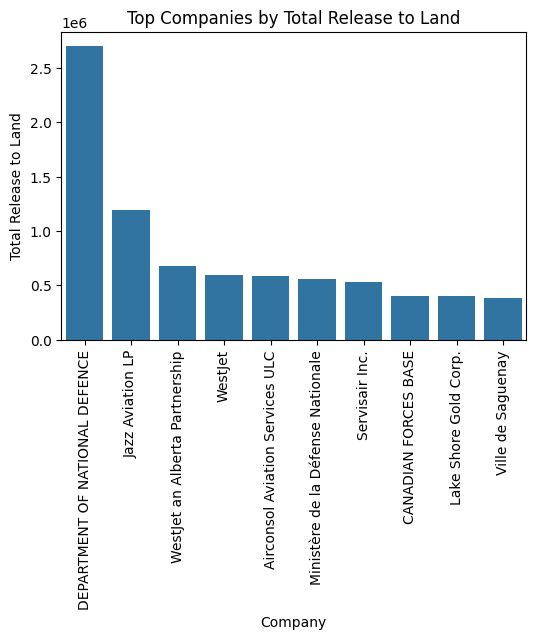

In [ ]:
top_companies = df.groupby('Company_Name')['Total Release to Land'].sum().reset_index().sort_values(by='Total Release to Land', ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x='Company_Name', y='Total Release to Land', data=top_companies)
plt.title('Top Companies by Total Release to Land')
plt.xlabel('Company')
plt.ylabel('Total Release to Land')
plt.xticks(rotation=90)
plt.show()



This heatmap displays the correlation between different variables in the dataset. The color scale ranges from -1 (strong negative correlation) to 1 (strong positive correlation).

Total Release to Land has the highest positive correlation with NAICS (0.34), indicating that certain industry classifications are more associated with land pollution.
NPRI_ID also has a moderate correlation (0.24) with Total Release to Land, suggesting that certain reporting facilities contribute more to land emissions.
Latitude and Longitude show a strong negative correlation (-0.68) with each other, which is expected due to geographical coordinates.
Reporting Year has a weak correlation with most variables, indicating minimal change in relationships over time.
This analysis helps in understanding which factors are more closely related to land pollution levels.

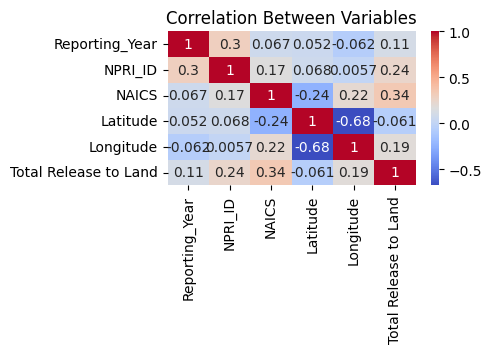

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(4,2))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Between Variables")
plt.show()

This pie chart represents the distribution of the most common pollutants released, with each section showing the proportion of a specific pollutant. The percentages indicate how much each pollutant contributes to the total emissions.

Ethylene glycol (51.6%) is the most released pollutant, making up more than half of the total emissions.
Lead (and its compounds) (14.3%) is the second highest, which is significant given its toxic effects.
Phosphorus (12.5%) and Copper (12.1%) have nearly equal contributions.
Ammonia (9.6%) has the lowest proportion among the listed pollutants.
The chart helps in understanding which pollutants are more prevalent in emissions, which can be crucial for regulatory measures and pollution control efforts.

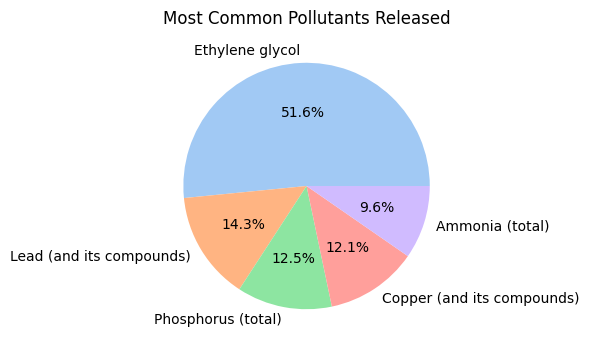

In [ ]:
# Group by pollutant and sum emissions
top_pollutants = df.groupby('Substance Name (English)')['Total Release to Land'].sum().reset_index()

# Get the top 5
top_pollutants = top_pollutants.sort_values(by='Total Release to Land', ascending=False).head(5)

# Plot
plt.figure(figsize=(4,4))
plt.pie(top_pollutants['Total Release to Land'], labels=top_pollutants['Substance Name (English)'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Most Common Pollutants Released")
plt.show()


This scatter plot visualizes the geographic distribution of land pollution in Canada based on latitude and longitude. Each dot represents a pollution site, and the size and color intensity of the dots indicate the total release of pollutants to land.

Key Observations:
Clustering of Pollution Sites: The dots are concentrated in certain regions, suggesting that specific areas experience higher pollution levels.
Variation in Pollution Magnitude: Darker and larger dots represent locations with higher pollutant releases, while lighter and smaller dots indicate lower releases.
Geographic Spread: The pollution sources are spread across different longitudes and latitudes, with noticeable clusters around -120° to -60° longitude (which corresponds to populated and industrial areas in Canada).
The legend provides reference values for pollution release amounts, with 2,000 to 8,000 as sample values, helping to compare different locations' pollution levels.

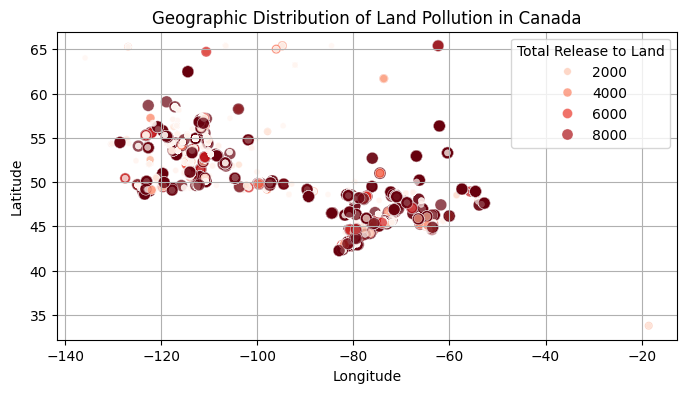

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="Total Release to Land",
    hue="Total Release to Land",
    palette="Reds",  # Red color for pollution hotspots
    alpha=0.7
)

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Land Pollution in Canada")
plt.grid(True)

# Show plot
plt.show()

The graph shows the total pollutant releases based on different estimation methods. The x-axis represents various estimation methods used to measure emissions, while the y-axis shows the total reported releases. Bars indicate the average total release, and error bars represent variability or uncertainty in the estimates. Some methods, like Continuous Emission Monitoring (M1) and Predictive Emission Monitoring (M2), report higher total releases, likely due to real-time tracking, while methods like Mass Balance (C) and Site-Specific Emission Factors (E1) report lower values, possibly due to estimation assumptions. The "Unknown" category has one of the highest values, highlighting potential data inconsistencies.









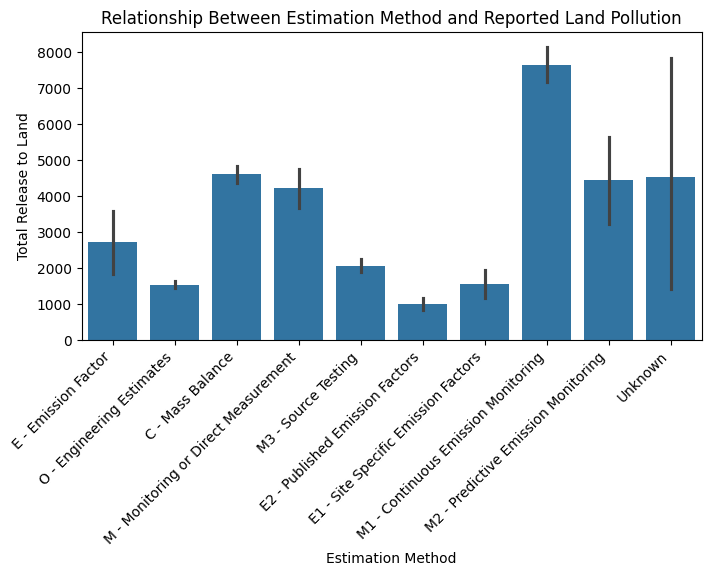

In [ ]:
plt.figure(figsize=(8, 4))

# Create a boxplot
sns.barplot(data=df, x='Estimation_Method', y='Total Release to Land')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Relationship Between Estimation Method and Reported Land Pollution')
plt.xlabel('Estimation Method')
plt.ylabel('Total Release to Land')

# Display the plot
plt.show()

The graph shows the top 10 industries with the highest total release to land. Understanding these top-polluting industries helps in identifying provinces with higher pollution potential. By focusing pollution control efforts on these key industries, provinces with a higher concentration of them can achieve the largest decreases in substance releases over the next five years.

#

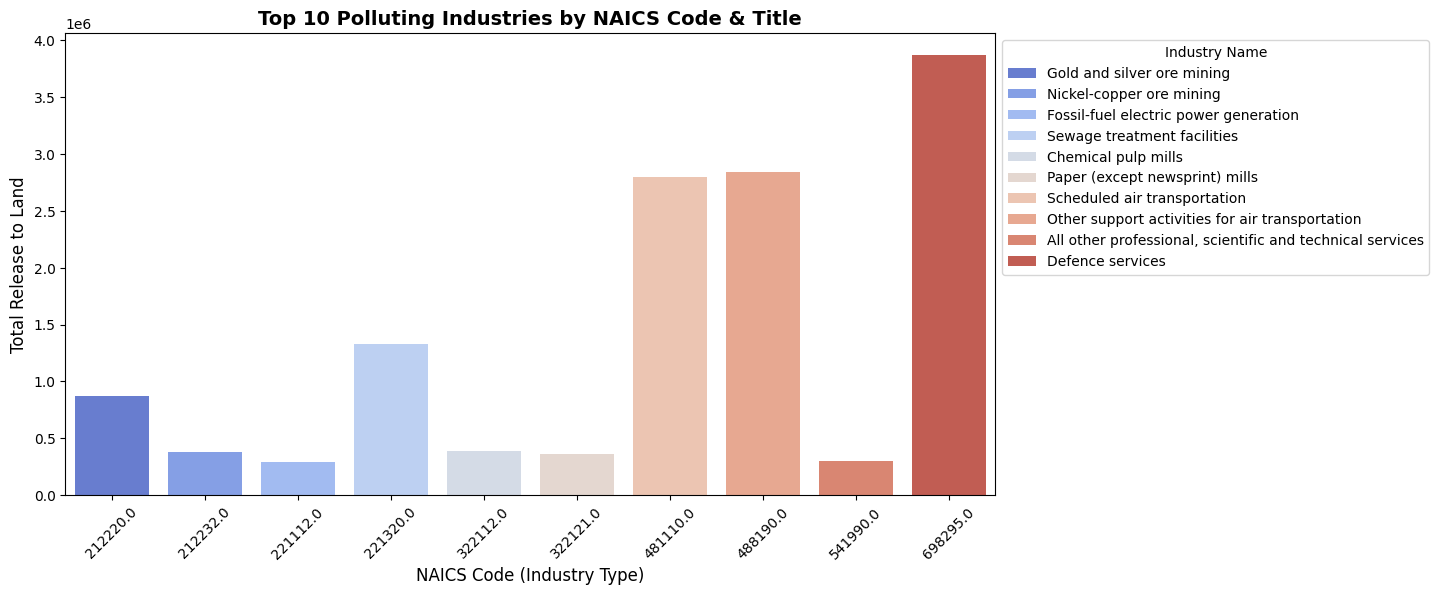

In [ ]:


# Aggregate total pollution by NAICS Code & NAICS Title
industry_pollution = df.groupby(['NAICS', 'NAICS Title'])['Total Release to Land'].sum().reset_index()

# Sort industries by total pollution (Top 10)
industry_pollution = industry_pollution.sort_values(by='Total Release to Land', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=industry_pollution, x='NAICS', y='Total Release to Land', hue='NAICS Title', dodge=False, palette='coolwarm')

# Labels and title
plt.title("Top 10 Polluting Industries by NAICS Code & Title", fontsize=14, fontweight='bold')
plt.xlabel("NAICS Code (Industry Type)", fontsize=12)
plt.ylabel("Total Release to Land", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.legend(title="Industry Name", bbox_to_anchor=(1, 1), loc='upper left')  # Move legend outside

plt.show()



Visuals for substances


The graph titled "Top 15 Substances with Highest Total Land Release" ranks substances by their total release to land. Ethylene glycol tops the list with the highest total release, followed by lead and phosphorus.

This information helps to identify which substances contribute most to land pollution. By targeting these substances for reduction, provinces can achieve significant decreases in overall substance releases, addressing your problem of predicting which province will see the largest decrease in pollution over the next five years.

<ipython-input-22-5ef30e0fce2b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_substances.values, y=top_substances.index, palette="viridis")


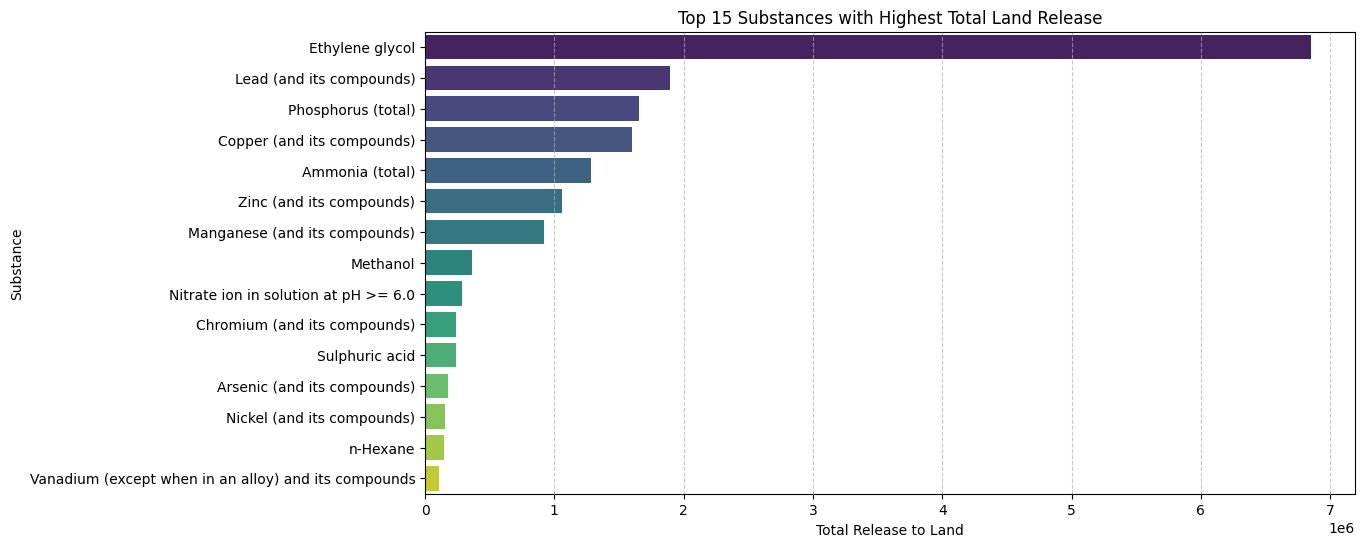

In [ ]:
top_substances = df.groupby("Substance Name (English)")['Total Release to Land'].sum().nlargest(15)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_substances.values, y=top_substances.index, palette="viridis")
plt.title("Top 15 Substances with Highest Total Land Release")
plt.xlabel("Total Release to Land")
plt.ylabel("Substance")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

he graph "Trend of Top 5 Substances Over Time" shows how the total land releases of five substances (ethylene glycol, ammonia, copper, lead, and phosphorus) have changed from 2000 to 2020. The y-axis represents the amount of land release, while the x-axis represents the years.

Ethylene glycol: Shows the highest and most variable release levels, with noticeable peaks around 2015 and 2020.

Ammonia, copper, lead, and phosphorus: These substances have relatively stable and lower release levels over the years.

By targeting substances like ethylene glycol, which have the highest and most fluctuating release levels, provinces can achieve significant decreases in pollution over the next five years.

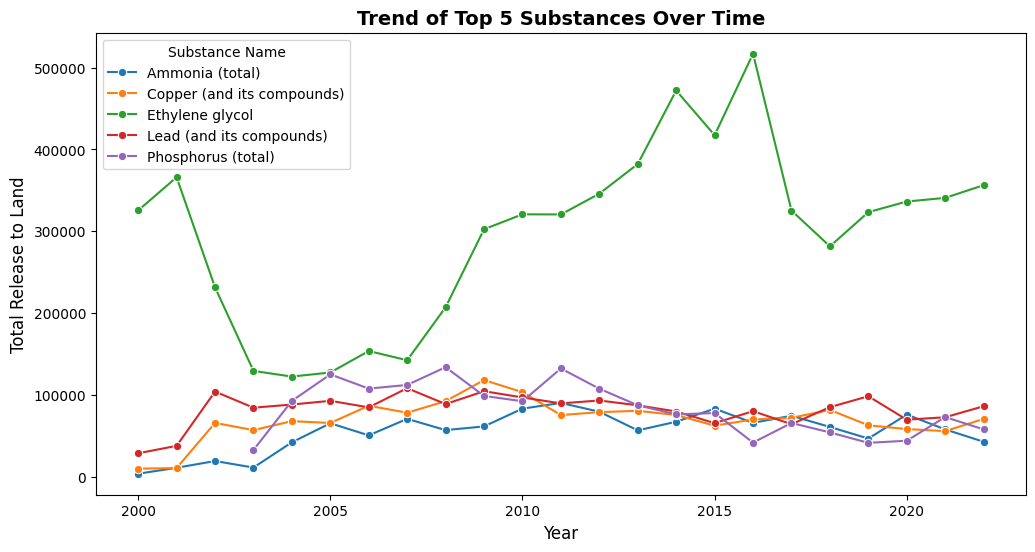

In [ ]:
top_substances = df.groupby('Substance Name (English)')['Total Release to Land'].sum().nlargest(5).index
trend_data = df[df['Substance Name (English)'].isin(top_substances)]
trend_data = trend_data.groupby(['Reporting_Year', 'Substance Name (English)'])['Total Release to Land'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_data, x='Reporting_Year', y='Total Release to Land', hue='Substance Name (English)', marker='o')
plt.title("Trend of Top 5 Substances Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Release to Land", fontsize=12)
plt.legend(title="Substance Name")
plt.show()


This pie chart represents the distribution of the most common pollutants released, with each section showing the proportion of a specific pollutant. The percentages indicate how much each pollutant contributes to the total emissions.

Ethylene glycol (51.6%) is the most released pollutant, making up more than half of the total emissions. Lead (and its compounds) (14.3%) is the second highest, which is significant given its toxic effects. Phosphorus (12.5%) and Copper (12.1%) have nearly equal contributions. Ammonia (9.6%) has the lowest proportion among the listed pollutants. The chart helps in understanding which pollutants are more prevalent in emissions, which can be crucial for regulatory measures and pollution control efforts.

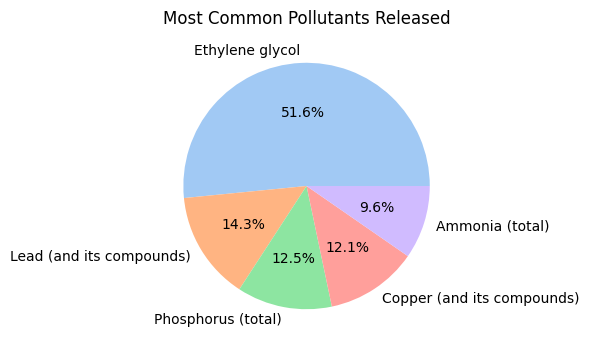

In [ ]:
# Group by pollutant and sum emissions
top_pollutants = df.groupby('Substance Name (English)')['Total Release to Land'].sum().reset_index()

# Get the top 5
top_pollutants = top_pollutants.sort_values(by='Total Release to Land', ascending=False).head(5)

# Plot
plt.figure(figsize=(4,4))
plt.pie(top_pollutants['Total Release to Land'], labels=top_pollutants['Substance Name (English)'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Most Common Pollutants Released")
plt.show()
